# Omar Hamoudeh
# Programming Exercise \#4
---

# Preamble

In [299]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Machine Learning for Diagnosis of 'Senioritis'**

## Problem 1.1

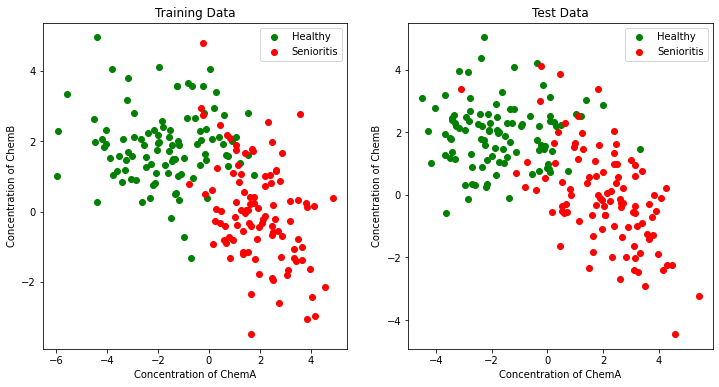

In [300]:
### Your code for 1.1 goes here ###

# Load the training and test data
traindf = pd.read_csv('SenioritisTrainingData.csv')
testdf = pd.read_csv('SenioritisTestData.csv')

# Scatter plot for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label='Healthy' if label == 'No Senioritis' else 'Senioritis')

plt.title('Training Data')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()

# Scatter plot for test data
plt.subplot(1, 2, 2)
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = testdf[testdf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label='Healthy' if label == 'No Senioritis' else 'Senioritis')

plt.title('Test Data')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()


## Problem 1.2

### (a)

In [301]:
### Your code for 1.2(a) goes here ###

grouped = traindf.groupby('ClassLabel')
mean = grouped.mean()
# Training for LDA and QDA
m0 = mean.loc['No Senioritis'].values # mean vector for No Senioritits
m1 = mean.loc['Senioritis'].values # mean vector for Senioritis
Pr0 = len(traindf[traindf['ClassLabel'] == 'No Senioritis']) / len(traindf) # Prior of No Senioritis
Pr1 = len(traindf[traindf['ClassLabel'] == 'Senioritis']) / len(traindf) # Prior of Senioritis
commonCovMatrix = np.cov(traindf.drop(columns=['ClassLabel']).values, rowvar=False) # Common covariance matrix to use for LDA

# Takes in realization x in the form of an array [x_1, x_2]
def LDA(x, m0, m1, Pr0, Pr1, var):
    scoreFunc0 = (
        np.dot( np.dot(x, np.linalg.inv(var)), m0 ) 
        - 0.5 * np.dot( np.dot(m0, np.linalg.inv(var)), m0 ) 
        + np.log(Pr0)
    )

    scoreFunc1 = (
        np.dot( np.dot(x, np.linalg.inv(var)), m1 ) 
        - 0.5 * np.dot( np.dot(m1, np.linalg.inv(var)), m1 ) 
        + np.log(Pr1)
    )
    #return [scoreFunc0, scoreFunc1]
    #return np.argmax([scoreFunc0, scoreFunc1])
    return 'No Senioritis' if np.argmax([scoreFunc0, scoreFunc1]) == 0 else 'Senioritis'


### (b)

In [302]:
### Your code for 1.2(b) goes here ###

cov0 = np.cov(grouped.get_group('No Senioritis').drop(columns='ClassLabel').values, rowvar=False) # Covariance for class 'No Senioritis' (QDA)
cov1 = np.cov(grouped.get_group('Senioritis').drop(columns='ClassLabel').values, rowvar=False) # Covariance for class 'Senioritis' (QDA)

def QDA(x, m0, m1, Pr0, Pr1, cov0, cov1):
    scoreFunc0 = (
        - 0.5 * np.dot( np.dot(x, np.linalg.inv(cov0)), x )
        + np.dot( np.dot(x, np.linalg.inv(cov0)), m0 )
        - 0.5 * np.dot( np.dot(m0, np.linalg.inv(cov0)), m0)
        - 0.5 * np.log( np.linalg.det(cov0) )
        + np.log(Pr0)
    )

    scoreFunc1 = (
        - 0.5 * np.dot( np.dot(x, np.linalg.inv(cov1)), x )
        + np.dot( np.dot(x, np.linalg.inv(cov1)), m1 )
        - 0.5 * np.dot( np.dot(m1, np.linalg.inv(cov1)), m1)
        - 0.5 * np.log( np.linalg.det(cov1) )
        + np.log(Pr1)
    )
    #return [scoreFunc0, scoreFunc1]
    #return np.argmax([scoreFunc0, scoreFunc1])
    return 'No Senioritis' if np.argmax([scoreFunc0, scoreFunc1]) == 0 else 'Senioritis'


### (c)

In [303]:
### Your code for 1.2(c) goes here ###

var0 = np.diag(cov0) # Variances for the features in class 'No Senioritis'
var1 = np.diag(cov1) # Variances for the features in class 'Senioritis'

def GNB(x, m0, m1, Pr0, Pr1, var0, var1):
    likelihood0 = Pr0 * np.prod((1 / np.sqrt(2 * np.pi * var0)) * np.exp(-( (x - m0) ** 2 ) / (2 * var0)))
    likelihood1 = Pr1 * np.prod((1 / np.sqrt(2 * np.pi * var1)) * np.exp(-( (x - m1) ** 2 ) / (2 * var1)))
    
    #return np.argmax([likelihood0, likelihood1])
    return 'No Senioritis' if np.argmax([likelihood0, likelihood1]) == 0 else 'Senioritis'


### (d)

In [304]:
### Your code for 1.2(d) goes here ###

# "Training"
data = traindf[['ChemA', 'ChemB']].values

# Takes in values from training data in the form of an array
# where each entry is an array containing info of one sample
def kNN(data, sample, k, norm):
    distances = np.linalg.norm(data - sample, ord=norm, axis=1)  # Compute norm-based distances
    
    kIndices = np.argsort(distances)[:k]  # Get indices of the k smallest distances
    kLabels = traindf['ClassLabel'][kIndices]  # Retrieve the labels of the k nearest neighbors
    
    uniqueLabels, counts = np.unique(kLabels, return_counts=True)  # Count occurrences of each label
    mostCommonLabel = uniqueLabels[np.argmax(counts)]  # Find the label with the highest count
    
    return mostCommonLabel

# Test
#print(kNN(data, [-3,0], 3, 2))

## Problem 1.3

### (a)

In [305]:
### Your code for 1.3(a) goes here ###
testdf['ldaPredict'] = testdf[['ChemA', 'ChemB']].apply(lambda row: LDA(row.values, m0, m1, Pr0, Pr1, commonCovMatrix), axis=1)
testdf['qdaPredict'] = testdf[['ChemA', 'ChemB']].apply(lambda row: QDA(row.values, m0, m1, Pr0, Pr1, cov0, cov1), axis=1)
testdf['gnbPredict'] = testdf[['ChemA', 'ChemB']].apply(lambda row: GNB(row.values, m0, m1, Pr0, Pr1, var0, var1), axis=1)
testdf['kNNPredict'] = testdf[['ChemA', 'ChemB']].apply(lambda row: kNN(data, row.values, 3, 2), axis=1)

print('Probability of misclassification')
print('LDA:', testdf.query('ClassLabel != ldaPredict').shape[0] / len(testdf))
print('QDA:', testdf.query('ClassLabel != qdaPredict').shape[0] / len(testdf))
print('GNB:', testdf.query('ClassLabel != gnbPredict').shape[0] / len(testdf))
print('kNN:', testdf.query('ClassLabel != kNNPredict').shape[0] / len(testdf))

Probability of misclassification
LDA: 0.085
QDA: 0.09
GNB: 0.085
kNN: 0.095


### (b)

In [306]:
### Your code for 1.3(b) goes here ###

tpLDA = testdf.query('ClassLabel == "Senioritis" and ldaPredict == "Senioritis"').shape[0]
tpQDA = testdf.query('ClassLabel == "Senioritis" and qdaPredict == "Senioritis"').shape[0]
tpGNB = testdf.query('ClassLabel == "Senioritis" and gnbPredict == "Senioritis"').shape[0]
tpKNN = testdf.query('ClassLabel == "Senioritis" and kNNPredict == "Senioritis"').shape[0]
numOfPositive = len(testdf.query('ClassLabel == "Senioritis"'))

print('     TP TPR')
print('LDA:', tpLDA, tpLDA / numOfPositive)
print('QDA:', tpQDA, tpQDA / numOfPositive)
print('GNB:', tpGNB, tpGNB / numOfPositive)
print('KNN:', tpKNN, tpKNN / numOfPositive)


     TP TPR
LDA: 89 0.89
QDA: 88 0.88
GNB: 86 0.86
KNN: 91 0.91


### (c)

In [307]:
### Your code for 1.3(c) goes here ###

fpLDA = testdf.query('ClassLabel == "No Senioritis" and ldaPredict == "Senioritis"').shape[0]
fpQDA = testdf.query('ClassLabel == "No Senioritis" and qdaPredict == "Senioritis"').shape[0]
fpGNB = testdf.query('ClassLabel == "No Senioritis" and gnbPredict == "Senioritis"').shape[0]
fpKNN = testdf.query('ClassLabel == "No Senioritis" and kNNPredict == "Senioritis"').shape[0]
numOfNegative = len(testdf.query('ClassLabel == "No Senioritis"'))

print('     FP FPR')
print('LDA:', fpLDA, fpLDA / numOfNegative)
print('QDA:', fpQDA, fpQDA / numOfNegative)
print('GNB:', fpGNB, fpGNB / numOfNegative)
print('KNN:', fpKNN, fpKNN / numOfNegative)

     FP FPR
LDA: 6 0.06
QDA: 6 0.06
GNB: 3 0.03
KNN: 10 0.1


### (d)

In [308]:
### Your code for 1.3(d) goes here ###

tnLDA = testdf.query('ClassLabel == "No Senioritis" and ldaPredict == "No Senioritis"').shape[0]
tnQDA = testdf.query('ClassLabel == "No Senioritis" and qdaPredict == "No Senioritis"').shape[0]
tnGNB = testdf.query('ClassLabel == "No Senioritis" and gnbPredict == "No Senioritis"').shape[0]
tnKNN = testdf.query('ClassLabel == "No Senioritis" and kNNPredict == "No Senioritis"').shape[0]
numOfNegative = len(testdf.query('ClassLabel == "No Senioritis"'))

print('     TN TNR')
print('LDA:', tnLDA, tnLDA / numOfNegative)
print('QDA:', tnQDA, tnQDA / numOfNegative)
print('GNB:', tnGNB, tnGNB / numOfNegative)
print('KNN:', tnKNN, tnKNN / numOfNegative)

     TN TNR
LDA: 94 0.94
QDA: 94 0.94
GNB: 97 0.97
KNN: 90 0.9


### (e)

In [309]:
### Your code for 1.3(e) goes here ###

fnLDA = testdf.query('ClassLabel == "Senioritis" and ldaPredict == "No Senioritis"').shape[0]
fnQDA = testdf.query('ClassLabel == "Senioritis" and qdaPredict == "No Senioritis"').shape[0]
fnGNB = testdf.query('ClassLabel == "Senioritis" and gnbPredict == "No Senioritis"').shape[0]
fnKNN = testdf.query('ClassLabel == "Senioritis" and kNNPredict == "No Senioritis"').shape[0]
numOfPositive = len(testdf.query('ClassLabel == "Senioritis"'))

print('     FN FNR')
print('LDA:', fnLDA, fnLDA / numOfPositive)
print('QDA:', fnQDA, fnQDA / numOfPositive)
print('GNB:', fnGNB, fnGNB / numOfPositive)
print('KNN:', fnKNN, fnKNN / numOfPositive)

     FN FNR
LDA: 11 0.11
QDA: 12 0.12
GNB: 14 0.14
KNN: 9 0.09


### Other performance metrics

In [310]:
# Precision Recall and F1 Score
print('Precision')
print('LDA:', round(tpLDA / ( tpLDA + fpLDA ), 3))
print('QDA:', round(tpQDA / ( tpQDA + fpQDA ), 3))
print('GNB:', round(tpGNB / ( tpGNB + fpGNB ), 3))
print('KNN:', round(tpKNN / ( tpKNN + fpKNN ), 3))

print('\nRecall')
print('LDA:', tpLDA / ( tpLDA + fnLDA ))
print('QDA:', tpQDA / ( tpQDA + fnQDA ))
print('GNB:', tpGNB / ( tpGNB + fnGNB ))
print('KNN:', tpKNN / ( tpKNN + fnKNN ))

print('\nF1 Score')
print('LDA:', round(tpLDA / ( tpLDA + 0.5 * (fpLDA + fnLDA) ), 3))
print('QDA:', round(tpQDA / ( tpQDA + 0.5 * (fpQDA + fnQDA) ), 3))
print('GNB:', round(tpGNB / ( tpGNB + 0.5 * (fpGNB + fnGNB) ), 3))
print('KNN:', round(tpKNN / ( tpKNN + 0.5 * (fpKNN + fnKNN) ), 3))


Precision
LDA: 0.937
QDA: 0.936
GNB: 0.966
KNN: 0.901

Recall
LDA: 0.89
QDA: 0.88
GNB: 0.86
KNN: 0.91

F1 Score
LDA: 0.913
QDA: 0.907
GNB: 0.91
KNN: 0.905


## Problem 1.4

`LDA` has the highest F1 score, which indicates a good balance between precision and recall; however considering that this classifier is going to be used for the automated diagnostics of a very serious illness I would choose `KNN` classifier as it minimizes the false negatives with a recall of 0.91

## Problem 1.5

### (a)

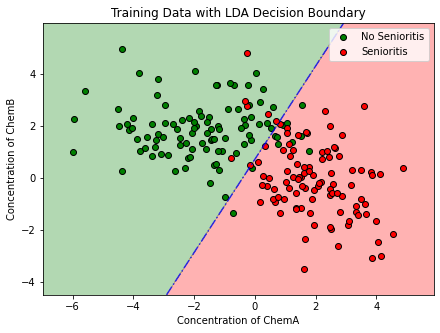

In [311]:
### Your code for 1.5(a) goes here ###

# Create a meshgrid for plotting
xx, yy = np.meshgrid(
    np.linspace(traindf['ChemA'].min() - 1, traindf['ChemA'].max() + 1, 500),
    np.linspace(traindf['ChemB'].min() - 1, traindf['ChemB'].max() + 1, 500)
)

# Compute LDA decision boundary parameters
invCov = np.linalg.inv(commonCovMatrix)
w = np.dot(invCov, (m0 - m1))  # Weight vector
b = 0.5 * (np.dot(np.dot(m1, invCov), m1) - np.dot(np.dot(m0, invCov), m0))  # Bias term

# Compute the decision boundary
Z = w[0] * xx + w[1] * yy + b

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, levels=[-float('inf'), 0, float('inf')], colors=['red', 'green'], alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], linestyles='-.', colors='blue', alpha=0.75)

# Scatter plot for training data
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label=label, edgecolor='k')

plt.title('Training Data with LDA Decision Boundary')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()


### (b)

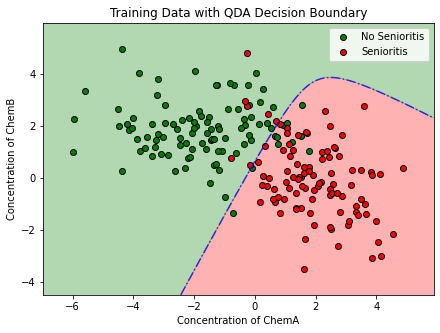

In [312]:
### Your code for 1.5(b) goes here ###

# Flatten grid for processing
grid = np.c_[xx.ravel(), yy.ravel()] 

# Evaluate the likelihood of the grid points under both Gaussian distributions
probClass0 = sps.multivariate_normal.pdf(grid, mean=m0, cov=cov0)
probClass1 = sps.multivariate_normal.pdf(grid, mean=m1, cov=cov1)

# Decision boundary: where probabilities are equal
decisionBoundary = (probClass0 - probClass1).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, decisionBoundary, levels=[-float('inf'), 0, float('inf')], colors=['red', 'green'], alpha=0.3)
plt.contour(xx, yy, decisionBoundary, levels=[0], linestyles='-.', colors='blue', alpha=0.75)

# Scatter plot for training data
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label=label, edgecolor='k')

plt.title('Training Data with QDA Decision Boundary')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()


### (c)

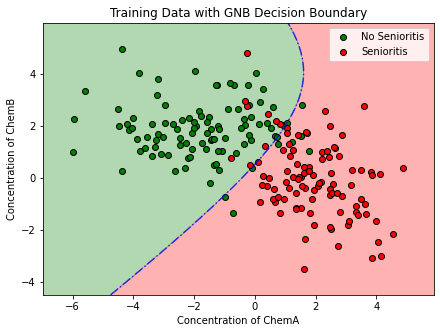

In [313]:
### Your code for 1.5(c) goes here ###

# Compute probabilities for each class
probClass0 = (Pr0 * np.product(sps.norm.pdf(grid, loc=m0, scale=np.sqrt(var0)),axis=1))
probClass1 = (Pr1 * np.product(sps.norm.pdf(grid, loc=m1, scale=np.sqrt(var1)),axis=1))

# Decision boundary: where probabilities are equal
decisionBoundary = (probClass0 - probClass1).reshape(xx.shape)

# Plot the decision boundary and scatter plot of training data
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, decisionBoundary, levels=[-float('inf'), 0, float('inf')], colors=['red', 'green'], alpha=0.3)
plt.contour(xx, yy, decisionBoundary, levels=[0], linestyles='-.', colors='blue', alpha=0.75)

# Scatter plot for training data
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label=label, edgecolor='k')

plt.title('Training Data with GNB Decision Boundary')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()

### (d)

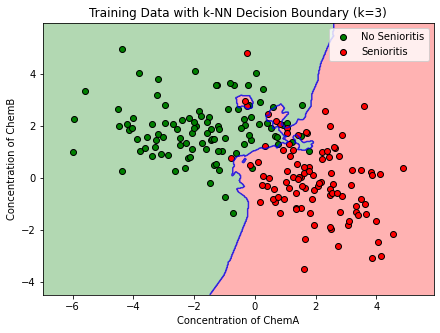

In [314]:
### Your code for 1.5(d) goes here ###

# Classify gridpoints and flatten for processing
gridLabels = np.array([kNN(data, sample, 3, 2) for sample in grid]).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, gridLabels == 'Senioritis', levels=[-0.5, 0.5, 1.5], colors=['green', 'red'], alpha=0.3)
plt.contour(xx, yy, gridLabels == 'Senioritis', levels=[0.5], linestyles='-', colors='blue', alpha=0.75)

# Scatter plot for training data
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label=label, edgecolor='k')

plt.title('Training Data with k-NN Decision Boundary (k=3)')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()


### (e)

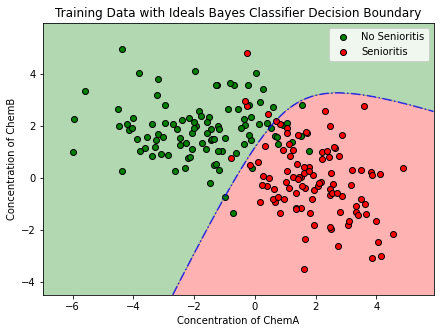

In [315]:
# Parameters for Ideal Bayes Classifier Given in Problem Statement
mu0 = np.array([-2, 2])
mu1 = np.array([2, 0])
C0 = np.array([[3, 0], [0, 1]])
C1 = np.array([[2, -1], [-1, 2]])

# Evaluate the likelihood of the grid points under both Gaussian distributions
probClass0 = sps.multivariate_normal.pdf(grid, mean=mu0, cov=C0)
probClass1 = sps.multivariate_normal.pdf(grid, mean=mu1, cov=C1)

# Decision boundary: where probabilities are equal
decisionBoundary = (probClass0 - probClass1).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, decisionBoundary, levels=[-float('inf'), 0, float('inf')], colors=['red', 'green'], alpha=0.3)
plt.contour(xx, yy, decisionBoundary, levels=[0], linestyles='-.', colors='blue', alpha=0.75)

# Scatter plot for training data
for label, color in [('No Senioritis', 'green'), ('Senioritis', 'red')]:
    subset = traindf[traindf['ClassLabel'] == label]
    plt.scatter(subset['ChemA'], subset['ChemB'], c=color, label=label, edgecolor='k')

plt.title('Training Data with Ideals Bayes Classifier Decision Boundary')
plt.xlabel('Concentration of ChemA')
plt.ylabel('Concentration of ChemB')
plt.legend()
plt.show()

## Problem 1.6


### (a)

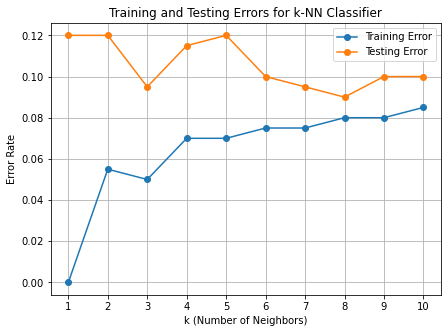

In [316]:
### Your code for 1.6(a) goes here ###

trainErrors = []
testErrors = []

for k in range(1, 11):
    traindf[f'kNNPredict{k}'] = traindf[['ChemA', 'ChemB']].apply(lambda row: kNN(data, row.values, k, 2), axis=1)
    testdf[f'kNNPredict{k}'] = testdf[['ChemA', 'ChemB']].apply(lambda row: kNN(data, row.values, k, 2), axis=1)
    
for k in range(1, 11):
    trainErrors.append(traindf.query(f'ClassLabel != kNNPredict{k}').shape[0] / traindf.shape[0])
    testErrors.append(testdf.query(f'ClassLabel != kNNPredict{k}').shape[0] / testdf.shape[0])


# Plotting training and testing errors
plt.figure(figsize=(7, 5))
plt.plot(range(1,11), trainErrors, marker='o', label='Training Error')
plt.plot(range(1,11), testErrors, marker='o', label='Testing Error')
plt.title('Training and Testing Errors for k-NN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(range(1,11))
plt.legend()
plt.grid()
plt.show()


### (b)

Based solely on the training and test error, I would go with `k = 8` as it offers the lowest error on the test data.  
One can also argue that `k = 3` might be a better choice as it has a really close test error to `k = 8` while also having a low error on the training data.  